# Terraform Primer for Cyera SE's

## Agenda
- Configure Laptop for Terraform
- Use Terraform to create an S3 Bucket
- Quick Terraform Tutorial

## Configure Laptop
1. Download Terraform binary
2. Add Terraform to your path

## Use Terraform to Create an S3 Bucket
1. Download Repo
2. Terraform Init
3. Add Credentials
4. Terraform Plan
5. Terraform Apply
6. Terraform Destory

---


## Configure Laptop

### Download Terrafrom: 
https://developer.hashicorp.com/terraform/install

Eg Mac Silicon - https://releases.hashicorp.com/terraform/1.6.5/terraform_1.6.5_darwin_arm64.zip

### Add Terraform to your path
```bash
# move to home dir
cd ~

#make a bin dir
mkdir bin

# Copy terraform binary from downloads to the bin dir
mv ~/Downloads/terraform ~/bin

# Update rc file to add bin dir to path
echo "export PATH=\$PATH:~/bin" >> .zshrc
source .zshrc

In [1]:
which terraform

/Users/rayryjewski/bin/terraform


---
## Use Terraform to Create an S3 Bucket

### Clone Github Repo 

In [2]:
cd ~
mkdir tmp
cd tmp
git clone https://github.com/ray-ryjewski-cyera/Cyera-s3-setup.git
cd Cyera-s3-setup
ls

mkdir: tmp: File exists
Cloning into 'Cyera-s3-setup'...
remote: Enumerating objects: 41, done.        
remote: Counting objects: 100% (41/41), done.        
remote: Compressing objects: 100% (33/33), done.        
remote: Total 41 (delta 15), reused 24 (delta 8), pack-reused 0        
Receiving objects: 100% (41/41), 18.07 MiB | 13.44 MiB/s, done.
Resolving deltas: 100% (15/15), done.
README.md	TF Primer.ipynb	main.tf		samples


### Terraform Init

In [3]:
terraform init


Initializing the backend...
Initializing modules...
- sample_files in .terraform/modules/sample_files

Initializing provider plugins...
- Finding latest version of hashicorp/aws...
- Installing hashicorp/aws v5.29.0...
- Installed hashicorp/aws v5.29.0 (signed by HashiCorp)

Terraform has created a lock file .terraform.lock.hcl to record the provider
selections it made above. Include this file in your version control repository
so that Terraform can guarantee to make the same selections by default when
you run "terraform init" in the future.

Terraform has been successfully initialized!

You may now begin working with Terraform. Try running "terraform plan" to see
any changes that are required for your infrastructure. All Terraform commands
should now work.

If you ever set or change modules or backend configuration for Terraform,
rerun this command to reinitialize your working directory. If you forget, other
commands will detect it and remind you to do so if necessary.


### Add Credentials

Login to AWS Sandbox and Select Command Line or programmatic access
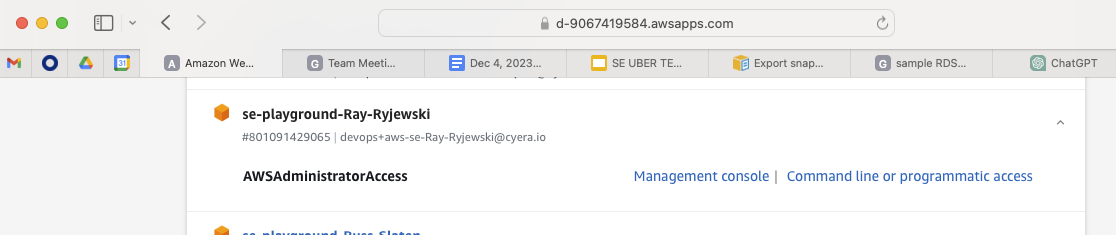

Copy and Paste credentials into your terminal session
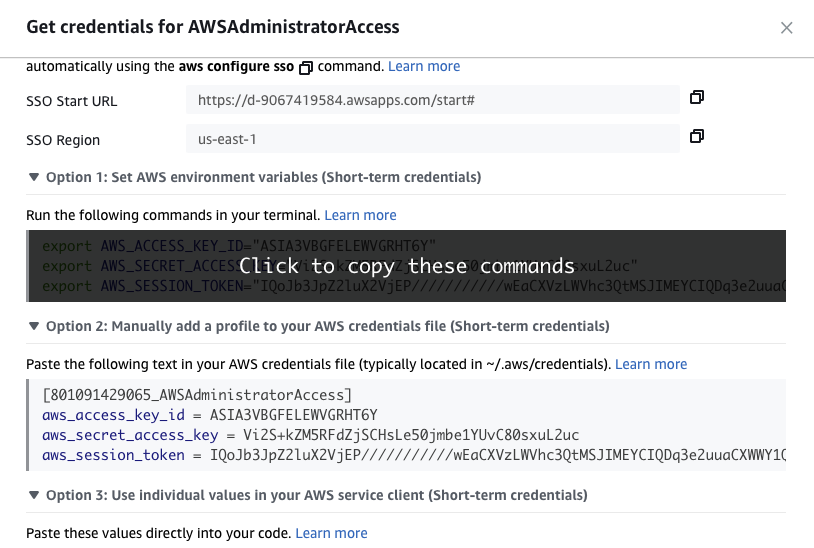

```bash
export AWS_ACCESS_KEY_ID="ASIA3..."
export AWS_SECRET_ACCESS_KEY="Vi2S+kZM5RF..."
export AWS_SESSION_TOKEN="IQoJb3JpZ2luX2VjEP///////////wEaCXVz..."

### Terraform Plan 
Compares reality to desired state


In [5]:
terraform plan


Terraform used the selected providers to generate the following execution plan.
Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # aws_s3_bucket.private_bucket will be created
  + resource "aws_s3_bucket" "private_bucket" {
      + acceleration_status         = (known after apply)
      + acl                         = (known after apply)
      + arn                         = (known after apply)
      + bucket                      = "rkr-priviate-bucket"
      + bucket_domain_name          = (known after apply)
      + bucket_prefix               = (known after apply)
      + bucket_regional_domain_name = (known after apply)
      + force_destroy               = false
      + hosted_zone_id              = (known after apply)
      + id                          = (known after apply)
      + object_lock_enabled         = (known after apply)
      + policy                      = (known after apply)
      + region      

### Terraform Apply 
Create resources  
You will be prompted for Name, Team, and a Prefix for the Bucket Name.  
If you would like to avoid the prompt, create a `terraform.tfvars` file with the variables pre-loaded.  
The prefix can only be composed of lowercase letters and '-'.  
A random string will be appended to make the name globally unique.  


In [6]:
terraform apply -auto-approve


Terraform used the selected providers to generate the following execution plan.
Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # aws_s3_bucket.private_bucket will be created
  + resource "aws_s3_bucket" "private_bucket" {
      + acceleration_status         = (known after apply)
      + acl                         = (known after apply)
      + arn                         = (known after apply)
      + bucket                      = "rkr-priviate-bucket"
      + bucket_domain_name          = (known after apply)
      + bucket_prefix               = (known after apply)
      + bucket_regional_domain_name = (known after apply)
      + force_destroy               = false
      + hosted_zone_id              = (known after apply)
      + id                          = (known after apply)
      + object_lock_enabled         = (known after apply)
      + policy                      = (known after apply)
      + region      

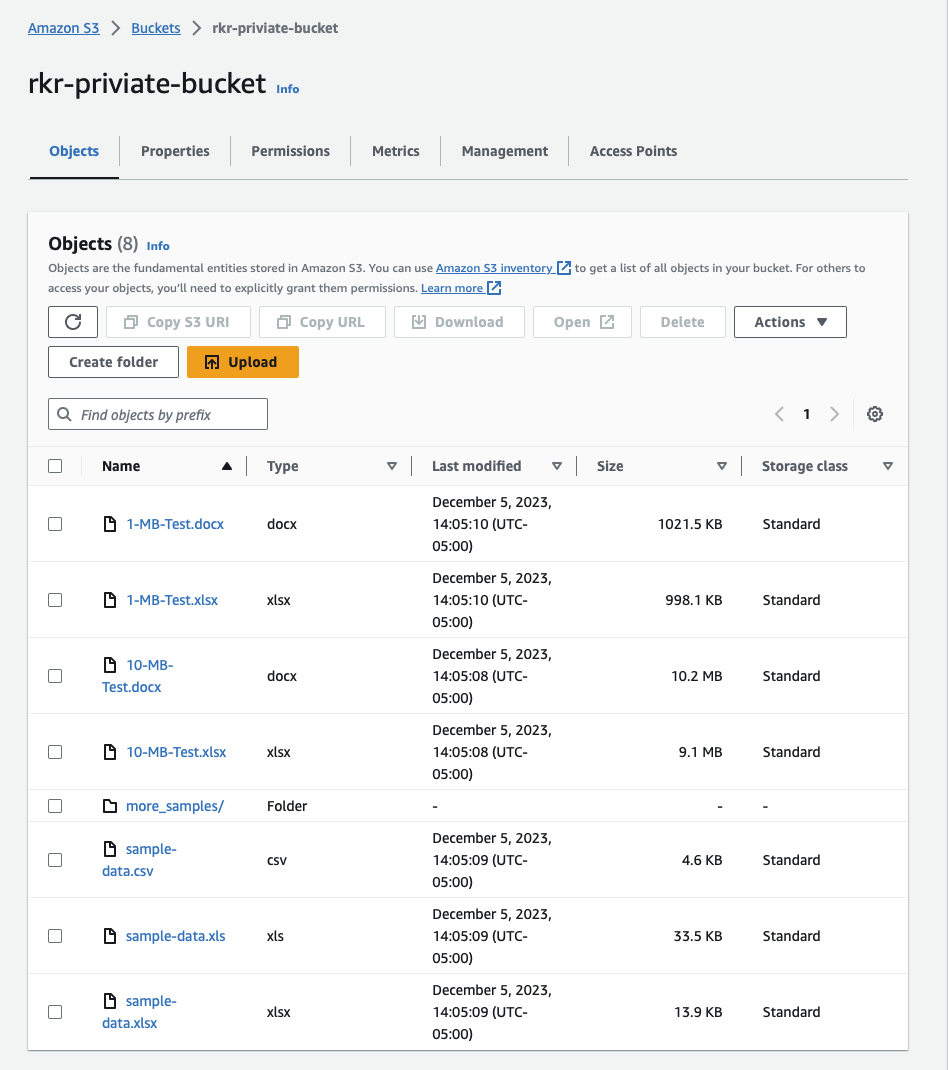

### Terraform Destroy 
Destroy's all resources in the configuration file.  This will not impact other S3 buckets or resources within your AWS environment.  Only impacts the resources you created.


In [7]:
terraform destroy -auto-approve

aws_s3_bucket.private_bucket: Refreshing state... [id=rkr-priviate-bucket]
aws_s3_object.a1mb-Test-docx: Refreshing state... [id=a1mb-Test-docx]
aws_s3_object.sample-data-csv: Refreshing state... [id=sample-data-csv]
aws_s3_object.sample-data-xlsx: Refreshing state... [id=sample-data-xlsx]
aws_s3_object.a10mb-Test-xlsx: Refreshing state... [id=a10mb-Test-xlsx]
aws_s3_object.a1mb-Test-xlsx: Refreshing state... [id=a1mb-Test-xlsx]
aws_s3_object.sample-data-xls: Refreshing state... [id=sample-data-xls]
aws_s3_object.sample-data-pdf: Refreshing state... [id=sample-data-pdf]
aws_s3_object.a10mb-Test-docx: Refreshing state... [id=a10mb-Test-docx]

Terraform used the selected providers to generate the following execution plan.
Resource actions are indicated with the following symbols:
  - destroy

Terraform will perform the following actions:

  # aws_s3_bucket.private_bucket will be destroyed
  - resource "aws_s3_bucket" "private_bucket" {
      - arn                         = "arn:aws:s3:::